Author: Anirudh Nuthalalapati Email: an1933@nyu.edu Gold prices have always seemed arbitrary. Sometimes people say that they have an inverse relationship with stock prices as alternative investments and sometimes they say that they are a direct function of supply and demand in the world. But, how factual are these assumptions. What do gold prices depend on and how can they change in several scenarios? This project will explore these issues in several steps:

1. I'll describe the data and its source
2. Change the data to fit a single template and congregate all of it into one picture.
3. Look at individual relationships with gold prices and several of its supposed factors
4. Use graphs to understand the nature of consumers in various scenarios
5. Propose a further extension to possible research
Data Report The key elements of the data, i.e. most of the individual factors that go into calculation of supply and demand are from a Thomson Gold Research Survey posted at the beginning of this year. The Url: http://thomsonreuters.ru/wp-content/uploads/2017/04/GFMS-Gold-Survey-2017.pdf.
The world government reserve changes, gold prices, and ETF Holdings data I received as excel sheets from gold.org. Stock prices were S&P 500 stock prices from yahoo.com/finance and world gdp was from worldbank.org which were also as excel sheets. My first step was save all of them as .csv’s to easily access them using pd.read_csv. U.S. Currency value and inflation both came from FRED database. Interest rates came from treasury.gov. Volatility is just VIX index historical prices. 

In the analysis below, I'm going to use the following packages: 
• Pandas package which will be my core tool to import, manipulate, merge, and analyze the data 
• Matplotlib package which will assist me in plotting my results 
• numpy which will allow me to perform certain mathematical functions
• statsmodels.formula.api for stats regressions
• from IPython.display import display, Image for display effects

In [30]:
from IPython.display import display, Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline


Bring in the Data:

In [12]:
index = ['']
columns = ["2007","2008","2009","2010","2011","2012","2013",'2014','2015','2016']
demand = pd.DataFrame(index=index, columns=columns)
supply = pd.DataFrame(index = index, columns = columns)

s1 = pd.read_csv('C:\Data_Bootcamp\Bootcamp_CSV_files\Mine_Supply.csv')

s2 = pd.read_csv('C:\Data_Bootcamp\Bootcamp_CSV_files\Supply_Scrap.csv')

s3 = pd.read_csv('C:\Data_Bootcamp\Bootcamp_CSV_files\Producer_Hedge.csv')

d1 = pd.read_csv('C:\Data_Bootcamp\Bootcamp_CSV_files\Jewelry_Demand.csv')

d2 = pd.read_csv('C:\Data_Bootcamp\Bootcamp_CSV_files\Technology_Demand.csv')

d3 = pd.read_csv('C:\Data_Bootcamp\Bootcamp_CSV_files\Bar_Demand.csv')

d4 = pd.read_csv('C:\Data_Bootcamp\Bootcamp_CSV_files\Coin_Demand.csv')

d5 = pd.read_csv('C:\Data_Bootcamp\Bootcamp_CSV_files\Reserve_Changes.csv')

d6 = pd.read_csv('C:\Data_Bootcamp\Bootcamp_CSV_files\ETF_Holdings.csv')

d7 = pd.read_csv('C:\Data_Bootcamp\Bootcamp_CSV_files\Demand_Medallion.csv')

price = pd.read_csv('C:\Data_Bootcamp\Bootcamp_CSV_files\Prices.csv')

gdp = pd.read_csv('C:\Data_Bootcamp\Bootcamp_CSV_files\World_GDP.csv')

stock = pd.read_csv('C:\Data_Bootcamp\Bootcamp_CSV_files\S&P_Prices.csv')

usd = pd.read_csv('C:\Data_Bootcamp\Bootcamp_CSV_files\Currency_USD.csv')

inflation = pd.read_csv('C:\Data_Bootcamp\Bootcamp_CSV_files\Inflation.csv')

ir = pd.read_csv('C:\Data_Bootcamp\Bootcamp_CSV_files\Interest_Rates.csv')

volatility = pd.read_csv('C:\Data_Bootcamp\Bootcamp_CSV_files\Volatility.csv')

In [13]:
for item in columns:
    d1.at['Jewelry', item] = d1[item].sum()                    # Creating a summation row
    
for item in columns:
    d2.at['Tech', item] = d2[item].sum()                       # Creating a summation row

for item in columns:
    d3.at['Bar', item] = d3[item].sum()                        # Creating a summation row

for item in columns:
    d4.at['Coin', item] = d4[item].sum()                       # Creating a summation row
    
for item in columns:
    d5.at['Reserve_Changes', item] = d5[item].sum()            # Creating a summation row

for item in columns:
    d7.at["Medallions", item] = d7[item].sum()                 # Creating a summation row

for item in columns:
    s1.at["Mine_Production", item] = s1[item].sum()            # Creating a summation row

for item in columns:
    s2.at["Scrap_Supply", item] = s2[item].sum()               # Creating a summation row

for item in columns:
    s3.at["Net_Hedging", item] = s3[item].sum()                # Creating a summation row


In [40]:
display(d1.tail(5))                                            #example of the format

,Country,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
15,Bangladesh,6.4,5.8,4.6,4.2,12.3,15.2,15.6,16.2,16.5,18.1
16,Italy,57.4,49.1,41.4,34.9,27.6,22.3,20.2,18.8,18.1,17.6
17,Canada,24.7,22.3,18.6,17.5,16.3,15.7,16.3,16.7,16.9,16.6
18,Vietnam,22.2,21.5,16.4,15.6,14.2,12.6,13.5,14.2,15.8,16.3
Jewelry,NaN,2113.7,2054.0,1672.7,1865.6,1869.9,1835.8,2484.4,2234.5,2103.2,1677.5


In [14]:
d6 = d6.drop(d6.index[0:48])                                   #editing d6 structure for more user friendly use
d6 = d6.drop("Gold, US$/oz", axis = 1)
d6 = d6.drop("Ounces", axis = 1)
d6 = d6.drop("Tonnes", axis = 1)
d6 = d6.drop("Value (USD)", axis = 1)
d6 = d6.drop("Date", axis = 1)

for column in list(d6):
    d6.at['2007', column] = d6[column][0:10].sum()/10          #Changing monthly numbers to yearly 
for column in list(d6):
    d6.at["2008", column] = d6[column][10:22].sum()/12         #Changing monthly numbers to yearly 
for column in list(d6):
    d6.at["2009", column] = d6[column][22:34].sum()/12         #Changing monthly numbers to yearly 
for column in list(d6):
    d6.at["2010", column] = d6[column][34:46].sum()/12         #Changing monthly numbers to yearly 
for column in list(d6): 
    d6.at["2011", column] = d6[column][46:58].sum()/12         #Changing monthly numbers to yearly 
for column in list(d6):
    d6.at["2012", column] = d6[column][58:70].sum()/12         #Changing monthly numbers to yearly 
for column in list(d6):
    d6.at["2013", column] = d6[column][70:82].sum()/12         #Changing monthly numbers to yearly 
for column in list(d6):
    d6.at["2014", column] = d6[column][82:94].sum()/12         #Changing monthly numbers to yearly 
for column in list(d6):
    d6.at["2015", column] = d6[column][94:106].sum()/12        #Changing monthly numbers to yearly 
for column in list(d6):
    d6.at["2016", column] = d6[column][106:118].sum()/12       #Changing monthly numbers to yearly 

d6 = d6.drop(d6.index[0:129])

d6 = d6.transpose()
for column in columns:
    d6.at['ETF_Holdings', column] = d6[column].sum()           #Creating summation row

d6 = d6.transpose()
d6["ETF_Change"] = d6["ETF_Holdings"].diff()                   #Finding YoY change, which is the demand, not total ETF holdings
d6 = d6.transpose()

In [41]:
display(d6.tail(5))

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
South Africa,15.829566,27.581727,39.922853,49.644806,46.381271,41.726142,43.596050,39.732973,29.297724,35.132341
Turkey,1.300000,1.300000,1.316417,1.455000,1.472000,1.616417,1.238079,0.908712,0.664000,0.519669
UAE,0.000000,0.000000,0.129600,0.155520,0.155520,0.155520,0.090720,0.000000,0.000000,0.000000
ETF_Holdings,762.804644,1037.978044,1714.756707,2120.287346,2361.069123,2670.370016,2304.706467,1854.342242,1723.416560,2122.979104
ETF_Change,NaN,275.173400,676.778663,405.530638,240.781778,309.300892,-365.663549,-450.364225,-130.925682,399.562544


In [15]:
price = price.drop(price.index[1:17])                          #editing structure
price = price.drop(list(price)[1:30], axis = 1)

for column in columns:
    price.at['Gold_Price', column] = price[column].sum()       #summation row

In [16]:
gdp = gdp.drop(list(gdp)[1:51], axis = 1) #editing structure
for column in columns:
    gdp.at['World_GDP', column] = gdp[column].sum()            #summation row

In [17]:
stock = stock.set_index("Date")                                #set index

for column in list(stock):
    stock.at['2007', column] = stock[column][0:12].sum()/12    #changing monthly to yearly average
for column in list(stock):
    stock.at["2008", column] = stock[column][12:24].sum()/12   #changing monthly to yearly average
for column in list(stock):
    stock.at["2009", column] = stock[column][24:36].sum()/12   #changing monthly to yearly average
for column in list(stock):
    stock.at["2010", column] = stock[column][36:48].sum()/12   #changing monthly to yearly average
for column in list(stock):
    stock.at["2011", column] = stock[column][48:60].sum()/12   #changing monthly to yearly average
for column in list(stock):
    stock.at["2012", column] = stock[column][60:72].sum()/12   #changing monthly to yearly average
for column in list(stock):
    stock.at["2013", column] = stock[column][72:84].sum()/12   #changing monthly to yearly average
for column in list(stock):
    stock.at["2014", column] = stock[column][84:96].sum()/12   #changing monthly to yearly average
for column in list(stock): 
    stock.at["2015", column] = stock[column][96:108].sum()/12  #changing monthly to yearly average
for column in list(stock):
    stock.at["2016", column] = stock[column][108:120].sum()/12 #changing monthly to yearly average

stock = stock.drop(stock.index[0:120])                         #editing structure
stock = stock.drop(list(stock)[1:6], axis = 1)
stock = stock.rename(columns = {'Open':'Stock_Price'})         #changing column name
stock = stock.transpose()

In [18]:
usd = usd.set_index("DATE")                                    #set index
usd = usd.transpose()
usd.columns = ["2007","2008","2009","2010","2011",             #original Date values were integers, 
                  "2012","2013",'2014','2015','2016']          #we needed strings for consistency
for column in list(usd):
    usd.at["USD_Value", column] = usd[column].sum()            #summation row

In [19]:
inflation = inflation.drop(inflation.index[11:105]) #editing
inflation = inflation.drop(inflation.index[0:1])
inflation = inflation.drop(list(inflation)[1:13], axis = 1)
inflation = inflation.iloc[::-1]                                  #reversing the scale from 2016-2007 to 2007-2016
inflation.columns = ["Date","Inflation"]                          #change column name
inflation = inflation.set_index("Date")                           #set index
inflation = inflation.transpose()
for column in list(inflation):
    inflation.at["Average_CPI", column] = inflation[column].sum() #summation
inflation.columns = ["2007","2008","2009","2010","2011",          #changing column name type
                  "2012","2013",'2014','2015','2016']

In [20]:
ir = ir.drop(list(ir)[1:9], axis = 1)                              #editting
ir = ir.drop(list(ir)[2:4], axis = 1)
ir = ir.set_index("Date")                                          #set index
ir = ir.transpose()
ir.columns = columns                                               #changing column name type
for column in list(ir):
    ir.at["Interest_Rate", column] = ir[column].sum()

In [21]:
volatility = volatility.drop(list(volatility)[2:7], axis = 1)            #editing
volatility = volatility.set_index(list(volatility)[0])
for column in list(volatility):
    volatility.at["2007", column] = volatility[column][0:12].sum()/12    #changing monthly to yearly average
for column in list(volatility):
    volatility.at["2008", column] = volatility[column][12:24].sum()/12   #changing monthly to yearly average
for column in list(volatility):
    volatility.at["2009", column] = volatility[column][24:36].sum()/12   #changing monthly to yearly average
for column in list(volatility):
    volatility.at["2010", column] = volatility[column][36:48].sum()/12   #changing monthly to yearly average
for column in list(volatility):
    volatility.at["2011", column] = volatility[column][48:60].sum()/12   #changing monthly to yearly average
for column in list(volatility):
    volatility.at["2012", column] = volatility[column][60:72].sum()/12   #changing monthly to yearly average
for column in list(volatility):
    volatility.at["2013", column] = volatility[column][72:84].sum()/12   #changing monthly to yearly average
for column in list(volatility):
    volatility.at["2014", column] = volatility[column][84:96].sum()/12   #changing monthly to yearly average
for column in list(volatility):
    volatility.at["2015", column] = volatility[column][96:108].sum()/12   #changing monthly to yearly average
for column in list(volatility):
    volatility.at["2016", column] = volatility[column][108:120].sum()/12  #changing monthly to yearly average
volatility = volatility.drop(volatility.index[0:120], axis = 0)
volatility = volatility.transpose()
volatility.columns = columns                                               #keeping columns constant
for column in list(ir):
    volatility.at["Volatility", column] = volatility[column].sum()         #summation row

In [22]:
demand = demand.append(d1[19:20])                                         #appending row to demand
demand = demand.append(d2[3:4])                                           
demand = demand.append(d3[23:24])                                         
demand = demand.append(d4[14:15])
demand = demand.append(d5[157:158])
demand = demand.append(d6[17:18])
demand = demand.append(d7[2:3])
supply = supply.append(s1[37:38])                                          #appending row to supply
supply = supply.append(s2[32:33])
supply = supply.append(s3[1:2])
for column in columns:
    demand.at['Total_Demand', column] = demand[column].sum()                #summation row, finding total demand
for column in columns:
    supply.at['Total_Supply', column] = supply[column].sum()                #summation row, finding total supply

In [51]:
display(demand.tail(5))

,Jewelry,Tech,Bar,Coin,Reserve_Changes,ETF_Change,Medallions,Total_Demand,Gold_Price,World_GDP,Stock_Price,USD_Value,Average_CPI,Interest_Rate,Volatility
2012,1835.8,429,1057.7,237.9,433.6,309.301,113.4,4416.7,1657.5,6.15946e+14,1372.59,99.7971,229.594,1.80344,18.6517
2013,2484.4,421,1445.4,325.7,341.6,-365.664,103.8,4756.24,1204.5,6.38287e+14,1618.35,100.902,232.957,2.35016,14.8658
2014,2234.5,403,887.5,200.1,261,-450.364,77.4,3613.14,1206,6.56878e+14,1926.67,103.989,236.736,2.53956,14.45
2015,2103.2,366,878.4,212.2,882.8,-130.926,73.4,4385.07,1060,6.1812e+14,2054.11,117.102,237.017,2.13829,17.61
2016,1677.5,354,788.5,218.7,81.8,399.563,52.1,3572.16,1145.9,6.24655e+14,2088.91,122.392,240.008,1.83744,16.1575


In [52]:
display(supply.tail(5))

,Mine_Production,Scrap_Supply,Net_Hedging,Total_Supply
2012,2883.3,1700.6,-40,4543.9
2013,3076.6,1303.5,-39,4341.1
2014,3172.4,1158.3,108,4438.7
2015,3208.6,1172.1,21,4401.7
2016,3222.2,1268,21,4511.2


In [55]:
x = ((3222)/2883)**(.2)-1
print(x)

0.022483194619398184


 - mine production has been very stable in the last 5 years, increasing at roughly 2.25% CAGR
 - scrap supply has always been reliant on supply in previous years as we can see the dramatic increase in demand from the Great Depression trickle down back into the market from 2012 onwards. Using a lagged time series regression to simulate a waterfall chart, we could potentially predict future supply as well.


In [23]:
demand = demand.append(price[1:2])                                          #appending row to demand
demand = demand.append(gdp[264:265])
demand = demand.append(stock[0:1])
demand = demand.append(usd[1:2])
demand = demand.append(inflation[1:2])
demand = demand.append(ir[1:2])
demand = demand.append(volatility[1:2])

In [24]:
demand = demand.transpose()                                                  #editting demand and supply datastructures
supply = supply.transpose()

demand = demand.drop(list(demand)[0:1], axis = 1)
demand = demand.dropna(how='all')
supply = supply.dropna(how = 'all')
supply = supply.drop(list(supply)[0:1], axis = 1)

In [25]:
gold = pd.concat([demand, supply], axis=1)                                    #merge supply and demand
gold = gold.reset_index()                                                     #reset_index to use years as a variable
gold=gold.rename(columns = {'index':'Years'})                                 #change column name from index to years

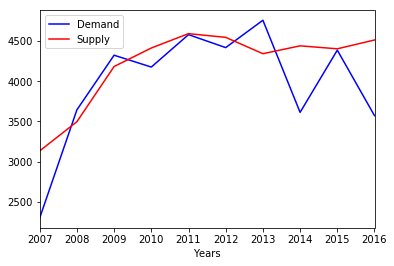

In [31]:
ax = gold.plot(kind = 'line',                                               #plot of demand and supply
          x = 'Years',
          y = 'Total_Demand',
          color = 'b',
          label = 'Demand')

gold.plot(kind = 'line',
          x = 'Years',
          y = 'Total_Supply',
          color = 'r',
          label = 'Supply',
          ax=ax)

From this initial curve, we can see from the abrupt increases and decreases over each year that demand has a much higher price elasticity than supply in the short run. So, we can assume that demand has a lot more volatile short term factors involved that affect it that supply does. In the long run, the price elasticity pattern continues, so the same can be said about demand long term factors. The biggest factor that really affects supply is gold prices itself. Depending on the price they can get, sellers will choose to withhold more or less of their gold supply, waiting for better years. 

In [32]:
gold['diff'] = gold['Total_Supply']-gold['Total_Demand']                                 #math variables created for the use of
gold["d_pct_change"] = gold['Total_Demand'].pct_change(periods = 1)                      #regressions and graphs
gold["s_pct_change"] = gold['Total_Supply'].pct_change(periods = 1)
gold['price_pct_change'] = gold['Gold_Price'].pct_change(periods = 1)
gold['gdp_pct_change'] = gold['World_GDP'].pct_change(periods = 1)
gold['realgold'] = gold["Gold_Price"] / gold["Average_CPI"]
gold['realusd'] = gold['USD_Value'] / gold['Average_CPI']
gold['logprice'] = np.log(gold.Gold_Price.astype(int))
gold['logusd'] = np.log((gold.USD_Value.astype(int)))
gold['logrealgold'] = np.log(gold.realgold.astype(int))
gold['logreserve'] = np.log(gold.Reserve_Changes.astype(int))
gold['logir'] = np.log(gold.Interest_Rate.astype(int))
gold['logstock'] = np.log(gold.Stock_Price.astype(int))
gold['logvol'] = np.log(gold.Volatility.astype(int))
gold['loggdp'] = np.log(gold.World_GDP)


C:\Users\Anirudh\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


In [53]:
display(gold.tail(5))

,Years,Jewelry,Tech,Bar,Coin,Reserve_Changes,ETF_Change,Medallions,Total_Demand,Gold_Price,...,gdp_pct_change,realgold,realusd,logprice,logusd,logrealgold,logreserve,logir,logstock,logvol
5,2012,1835.8,429,1057.7,237.9,433.6,309.301,113.4,4416.7,1657.5,...,0.025883,7.21927,0.434668,7.412764,4.595120,1.945910,6.070738,0.000000,7.224025,2.890372
6,2013,2484.4,421,1445.4,325.7,341.6,-365.664,103.8,4756.24,1204.5,...,0.036270,5.17048,0.433134,7.093405,4.605170,1.609438,5.831882,0.693147,7.388946,2.639057
7,2014,2234.5,403,887.5,200.1,261,-450.364,77.4,3613.14,1206,...,0.029127,5.09428,0.439261,7.095064,4.634729,1.609438,5.564520,0.693147,7.563201,2.639057
8,2015,2103.2,366,878.4,212.2,882.8,-130.926,73.4,4385.07,1060,...,-0.059003,4.47225,0.494065,6.966024,4.762174,1.386294,6.782192,0.693147,7.627544,2.833213
9,2016,1677.5,354,788.5,218.7,81.8,399.563,52.1,3572.16,1145.9,...,0.010571,4.77442,0.509951,7.043160,4.804021,1.386294,4.394449,0.000000,7.643962,2.772589


Now that we have all the variables together, we can begin comparing factors of demand and supply with each other. Initial observations:
 - gold demand seems to be in a slump, which conforms with expections as gold prices have been increasing in recent terms and with the resurgence of the equities market from the Great Depression, we are seeing more and more investment within that area, which can be seen with the rapidly increasing stock prices and low volatility. 
 - Tech demand seems to also be in a slump, as many tech companies are focusing away from using gold in tech due to its high prices. With newer alternatives constantly surfacing, I don't see tech demand to surge for at least next 5 years. 
 - Gold ever remains a solid alternative investment for portfolio diversification, known for its price stability, so we can see a very stable demand for bars, coins, and medallions
 - ETF Holdings have increasing by 400 tonnes in 2016, which is interesting because usually an ETF increases its holdings when it expects gold prices to dip which can be seen in 2014 when they dropped 450 tonnes in the market in anticipation of the decrease in gold prices in 2015. So, from this relationship, does that mean gold prices are expected to increase in 2017 and 2018?

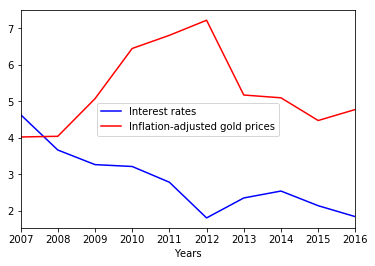

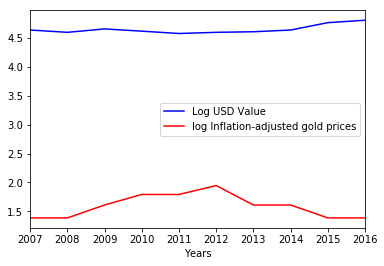

In [34]:
ax = gold.plot(kind = 'line',                            #plot of the log of USD currency and log real gold prices
          x = 'Years',
          y = 'logusd',
          color = 'b',
          label = 'Log USD Value'
          )

gold.plot(kind = 'line',
          x = 'Years',
          y = 'logrealgold',
          color = 'r',
          label = 'log Inflation-adjusted gold prices',
          ax=ax
          )

 - strong correlation between USD value and gold prices as we confirmed before

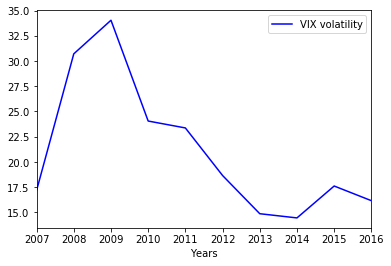

In [35]:
gold.plot(kind = 'line',                               #plot of volatility over the years
          x = 'Years',
          y= 'Volatility',
          color = 'b',
          label = 'VIX volatility',
          )

- as a comparison, with all the other graphs, we can see the correlation between gold prices and volatility of equities, since when investors are worried about sudden changes in stock prices, they tend to shift towards the more stable, but lower returns gold

In [58]:
result4 = smf.ols(formula='logrealgold ~ logvol + logir + logusd', data=gold).fit()  #regression using log real gold prices, 
display(result4.summary())                               #log of VIX prices, log of stock prices, and log of USD currency value

C:\Users\Anirudh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            logrealgold   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     3.813
Date:                Sat, 23 Dec 2017   Prob (F-statistic):             0.0767
Time:                        23:37:41   Log-Likelihood:                 7.5600
No. Observations:                  10   AIC:                            -7.120
Df Residuals:                       6   BIC:                            -5.910
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.2413      3.391      3.315      0.016       2.944      19.538
logvol         0.1013      0.178      0.568      0.590      -0.335       0.537
logir         -0.2802      0.123     -2.272      0.063      -0.582       0.022
logusd        -2.0967      0.699     -2.998      0.024      -3.808      -0.385
==============================================================================
Omnibus:                        3.530   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.171   Jarque-Bera (JB):                0.725
Skew:                          -0.485   Prob(JB):                        0.696
Kurtosis:                       3.893   Cond. No.                         423.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

-this is showing the little impact interest rates by themselves have on gold prices, contrary to popular belief. But, as we expected volatility has a positive impact on gold prices, while interest rates and USD currency have a negative effect.

In [38]:
result2 = smf.ols(formula='logrealgold ~ logir + logstock + gdp_pct_change', data=gold).fit() #regression
display(result2.summary())

C:\Users\Anirudh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            logrealgold   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     1.768
Date:                Sat, 23 Dec 2017   Prob (F-statistic):              0.269
Time:                        22:16:10   Log-Likelihood:                 5.3745
No. Observations:                   9   AIC:                            -2.749
Df Residuals:                       5   BIC:                            -1.960
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.6952      2.096      2.717      0.042       0.307      11.084
logir             -0.2953      0.181     -1.630      0.164      -0.761       0.170
logstock          -0.5364      0.277     -1.937      0.111      -1.248       0.176
gdp_pct_change     0.7084      0.978      0.724      0.501      -1.806       3.223
==============================================================================
Omnibus:                        1.828   Durbin-Watson:                   0.961
Prob(Omnibus):                  0.401   Jarque-Bera (JB):                1.186
Skew:                          -0.784   Prob(JB):                        0.553
Kurtosis:                       2.161   Cond. No.                         264.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
result = smf.ols(formula='logprice ~ logreserve + logusd', data=gold).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               logprice   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     3.157
Date:                Sat, 23 Dec 2017   Prob (F-statistic):              0.130
Time:                        22:16:18   Log-Likelihood:                 6.8965
No. Observations:                   8   AIC:                            -7.793
Df Residuals:                       5   BIC:                            -7.555
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.4753      2.919      4.959      0.0

C:\Users\Anirudh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


This is a very obvious relationship, gold prices have a negative correlation to Government reserves and USD currency because governments are exactly like investors wishing to buy low and sell high and US currency has an direct effect on gold prices.

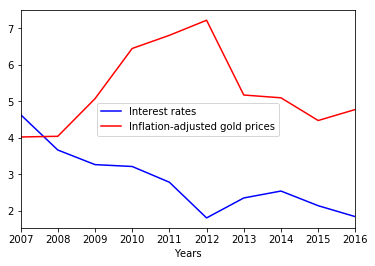

In [59]:
ax = gold.plot(kind = 'line',                                             #plot of interest rates and inflation-adjusted gold
          x = 'Years',                                                    #prices
          y = 'Interest_Rate',
          color = 'b',
          label = 'Interest rates'
          )

gold.plot(kind = 'line',
          x = 'Years',
          y = 'realgold',
          color = 'r',
          label = 'Inflation-adjusted gold prices',
          ax=ax
          )

- there is a strong negative correlation between interest rates and inflation adjusted gold prices as everyone believes. But, the question is: why isn't 1.0? Well, the answer isn't as simple as adding a couple other factors. These factors work hand in hand with each other. For example, interest rates cause stocks especially banks to be more profitable with higher returns, so as an alternative investment, gold prices are naturally hurt with increasing interest rates. However, the magnitude of the effect really depends on many more factors including volatility, political affairs, world gdp growth as a proxy for consumer spending growth, and us currency value since gold is dollar denominated. Because of these effects, sometimes decreasing interest rates can even cause gold prices to drop as shown in 2012.

Conclusion:
    Overall, we saw that out of the many factors that the populace believe to adversely affect gold prices, only a few actually do. First of all, it was proven that interest rates by themselves, do not have a major impact as shown in the last graph with interest rates and gold prices inflation adjusted. The biggest and really only reason that interest rates have a strong negative correlation is because many factors go hand in hand with it including USD currency, stock rally, and decreased inflation. Together, they control how gold demand and prices move. Second, gold supply is a very stable aspect of gold prices. Due to its relatively low price inelasticity, it keeps demand in check and allows for price stability for the asset overall. In my opinion, the only major factors that affect supply are pricing of unrefined gold and cost of mining since more than 50% of total supply comes from mines. Therfore, how much the miners sell is a good indicator of how much supply we will get.